<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Изучение-данных-из-файла" data-toc-modified-id="Изучение-данных-из-файла-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Изучение данных из файла</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Предобработка данных</a></span><ul class="toc-item"><li><span><a href="#Проверка-данных-на-пропуски." data-toc-modified-id="Проверка-данных-на-пропуски.-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Проверка данных на пропуски.</a></span></li><li><span><a href="#Работа-с-типом-данных." data-toc-modified-id="Работа-с-типом-данных.-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Работа с типом данных.</a></span></li><li><span><a href="#Проверка-данных-на-дубликаты." data-toc-modified-id="Проверка-данных-на-дубликаты.-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Проверка данных на дубликаты.</a></span></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Расчёты-и-добавление-результатов-в-таблицу" data-toc-modified-id="Расчёты-и-добавление-результатов-в-таблицу-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Расчёты и добавление результатов в таблицу</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Исследовательский-анализ-данных" data-toc-modified-id="Исследовательский-анализ-данных-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Исследовательский анализ данных</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Общий вывод</a></span></li></ul></div>

# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекc Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

**Цель исследования** - установить параметры для постройки автоматизированной системы, которая отследит аномалии и мошенническую деятельность
**Ход исследования** 

 
Мы проверим данные на ошибки и оценим их влияние на исследование. Затем, на этапе предобработки поищем возможность исправить самые критичные ошибки данных, поработаем с пропусками и типом данных.
 
Таким образом, исследование пройдёт в четыре этапа:
 1. Обзор данных.
 2. Предобработка данных.
 3. Расчет и добавление необходимых результатов.
 4. Исследовательский анализ данных

## Изучение данных из файла

In [1]:
#импортируем необходимые библиотеки для работы
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# прочитаем файл
data = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')

In [3]:
# применим метод, что бы отображались все столбцы
pd.options.display.max_columns = 50

In [4]:
# выведем первые 10 строк
data.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,False,False,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,False,False,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,False,False,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,False,False,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,False,False,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,False,False,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,False,False,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,False,False,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,False,False,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,False,False,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


In [5]:
#посмотрим информацию о датасете
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

In [6]:
#вызовим метод describe что бы увидеть сразу основные метрики по столбцам
data.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23699.000000,2.369900e+04,23699.000000,23699.000000,14504.000000,23613.000000,21796.000000,23699.000000,21421.000000,12180.000000,18157.000000,18180.000000,18181.000000,8079.000000,18181.000000,9110.000000,20518.000000
mean,9.858475,6.541549e+06,60.348651,2.070636,2.771499,10.673824,34.457852,5.892358,10.569807,1.150082,28793.672193,14191.277833,0.611408,490.804555,0.770255,517.980900,180.888634
std,5.682529,1.088701e+07,35.654083,1.078405,1.261056,6.597173,22.030445,4.885249,5.905438,1.071300,12630.880622,8608.386210,0.802074,342.317995,0.938346,277.720643,219.727988
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.520000,5.000000,18.600000,2.000000,7.000000,0.000000,18585.000000,9238.000000,0.000000,288.000000,0.000000,294.000000,45.000000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.100000,1.000000,26726.000000,13098.500000,0.000000,455.000000,1.000000,502.000000,95.000000
75%,14.000000,6.800000e+06,69.900000,3.000000,2.800000,16.000000,42.300000,8.000000,12.000000,2.000000,37273.000000,16293.000000,1.000000,612.000000,1.000000,729.000000,232.000000
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


### Вывод

В изученном датасете 23699 строк  и 22 столбца со значениями. согласно документации, описание столбцов ниже: 
- *airports_nearest* — расстояние до ближайшего аэропорта в метрах (м)
- *balcony* — число балконов
- *ceiling_height* — высота потолков (м)
- *cityCenters_nearest* — расстояние до центра города (м)
- *days_exposition* — сколько дней было размещено объявление (от публикации до снятия)
- *first_day_exposition* — дата публикации
- *floor* — этаж
- *floors_total* — всего этажей в доме
- *is_apartment* — апартаменты (булев тип)
- *kitchen_area* — площадь кухни (м²)
- *last_price* — цена на момент снятия с публикации
- *living_area* — жилая площадь (м²)
- *locality_name* — название населённого пункта
- *open_plan* — свободная планировка (булев тип)
- *parks_around3000* — число парков в радиусе 3 км
- *parks_nearest* — расстояние до ближайшего парка (м)
- *ponds_around3000* — число водоёмов в радиусе 3 км
- *ponds_nearest* — расстояние до ближайшего водоёма (м)
- *rooms* — число комнат
- *studio* — квартира-студия (булев тип)
- *total_area* — площадь квартиры в квадратных метрах (м²)
- *total_images* — число фотографий квартиры в объявлении


В данном датасете есть пропуски, с котрыми мы поработаем в предообратке данных, так же необходимо поработать с типами данных и аномалиями, которые уже видно, например, в высоте потолков и этажности. 

## Предобработка данных

### Проверка данных на пропуски.

In [7]:
# посчитаем сколько пропусков в каждом столбце
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

В большинстве столбцов обнаружены пропуски, попробуем найти их причину и если сеть возможность заменить. Там где очень мало данных, можно удалить данные строки с пропусками это этажность и местонахождение.

In [8]:
# удалим строки с пропусками в двух столбцах
data.dropna(subset = ['locality_name'], inplace=True)


In [9]:
data.dropna(subset = ['floors_total'], inplace=True)

In [10]:
# проверим сколько пропусков в каждом столбце
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9084
floors_total                0
living_area              1865
floor                       0
is_apartment            20805
studio                      0
open_plan                   0
kitchen_area             2222
balcony                 11475
locality_name               0
airports_nearest         5524
cityCenters_nearest      5501
parks_around3000         5500
parks_nearest           15535
ponds_around3000         5500
ponds_nearest           14529
days_exposition          3171
dtype: int64

In [11]:
# посмотри строки с пропусками в столбце ceiling_height
data[data['ceiling_height'].isna()].head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,False,False,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,False,False,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,False,False,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
5,10,2890000.0,30.4,2018-09-10T00:00:00,1,NaN,12.0,14.4,5,NaN,False,False,9.1,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.3,2017-11-02T00:00:00,1,NaN,26.0,10.6,6,NaN,False,False,14.4,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0


Взаимосвязи нет, но можно заменить средним значением среди помещений в зданиях такой же этажности, так как чаще всего в таких случаях тип домов примерно одинаковый.

In [12]:
# напишем функцию замены одного значения медианной по группировке других значений
def replace_median(emthy_value, group_value):
    
    median_replace = data.groupby(group_value)[emthy_value].median()
    for total in data[group_value].unique():
        median = median_replace[total]
        data.loc[(data[group_value] == total) & (data[emthy_value].isna()), emthy_value] = median

In [13]:
# вызовем функцию для замены пропусков столбца ceiling_height медианной среди значений по группировке: floors_total
replace_median('ceiling_height', 'floors_total')

In [14]:
# проверим остались ли строки с пропусками и выведем их
data[data['ceiling_height'].isna()]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
11575,9,9900000.0,101.0,2016-04-28T00:00:00,3,NaN,33.0,53.0,32,False,False,False,21.0,0.0,Санкт-Петербург,18732.0,20444.0,0.0,NaN,3.0,80.0,53.0


Одна строка не заменилась, что бы понять почему это произошло необходимо посмотреть строки со значением floors_total = 33, скорей всего такой дом один и заменить его нечем

In [15]:
# посмотрим строки с этажностью 33
data[data['floors_total'] == 33]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
11575,9,9900000.0,101.0,2016-04-28T00:00:00,3,NaN,33.0,53.0,32,False,False,False,21.0,0.0,Санкт-Петербург,18732.0,20444.0,0.0,NaN,3.0,80.0,53.0


Как и предполагалось такой дом 1 в своем роде, предлагаю удалить данное значение, так как оно всего одно и не повлияет на анализ.

In [16]:
# удалим строку с пропуском в столбце ceiling_height
data.dropna(subset = ['ceiling_height'], inplace=True)

In [17]:
# проверим еще раз есть ли строки с пропусками в данном столбце
data[data['ceiling_height'].isna()]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition


In [18]:
# посмотрим строки с пропусками в living_area
data[data['living_area'].isna()].head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,2.60,14.0,NaN,9,NaN,False,False,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
7,5,7915000.0,71.6,2019-04-18T00:00:00,2,2.75,24.0,NaN,22,NaN,False,False,18.9,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
30,12,2200000.0,32.8,2018-02-19T00:00:00,1,2.55,9.0,NaN,2,NaN,False,False,NaN,NaN,Коммунар,NaN,NaN,NaN,NaN,NaN,NaN,63.0
37,10,1990000.0,45.8,2017-10-28T00:00:00,2,2.50,5.0,NaN,1,NaN,False,False,NaN,NaN,поселок городского типа Красный Бор,NaN,NaN,NaN,NaN,NaN,NaN,196.0
44,13,5350000.0,40.0,2018-11-18T00:00:00,1,2.75,22.0,NaN,3,NaN,False,False,NaN,1.0,Санкт-Петербург,30471.0,11603.0,1.0,620.0,1.0,1152.0,NaN


Пропуски в living_area предлагаю заменить медианой среди группировки по количеству комнат, так как чаще всего площадь квартиры зависит от количества комнат.

In [19]:
# вызовем функцию для замены пропусков столбца living_area медианной среди значений по группировке: rooms
replace_median('living_area', 'rooms')

In [20]:
# посмотри строки с пропусками в столбце ceiling_height
data[data['kitchen_area'].isna()].head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,2.60,14.0,45.0,9,NaN,False,False,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
30,12,2200000.0,32.8,2018-02-19T00:00:00,1,2.55,9.0,17.6,2,NaN,False,False,NaN,NaN,Коммунар,NaN,NaN,NaN,NaN,NaN,NaN,63.0
37,10,1990000.0,45.8,2017-10-28T00:00:00,2,2.50,5.0,30.5,1,NaN,False,False,NaN,NaN,поселок городского типа Красный Бор,NaN,NaN,NaN,NaN,NaN,NaN,196.0
44,13,5350000.0,40.0,2018-11-18T00:00:00,1,2.75,22.0,17.6,3,NaN,False,False,NaN,1.0,Санкт-Петербург,30471.0,11603.0,1.0,620.0,1.0,1152.0,NaN
59,15,6300000.0,46.5,2017-03-06T00:00:00,1,2.70,13.0,17.6,13,NaN,False,False,NaN,NaN,Санкт-Петербург,11125.0,14501.0,0.0,NaN,0.0,NaN,336.0


В связи с тем, что площадь кухни может очень сильно разнится в различных квартирах и медиана среди всех значений может сильно выбиваться, предлагаю в дальнейшем вычилить медиану среди отношения площади кухни к общей площади. А пропуски в площади кухни заменить медианной отношения кухни к общей помноженной на общую площадь.  

Так как апартаменты встречаются редко, то скорей всего все пропуски в столбце is_apartment это False

In [21]:
# заменим пропуски в столбце is_apartment значением False и сразу же изменим тип на bool. Далее проверим получилось ли заменить
data['is_apartment'] = data['is_apartment'].fillna('False').astype(bool)
data['is_apartment'].value_counts()

True     20855
False     2709
Name: is_apartment, dtype: int64

В столбце балконов скорей всего пропуски, так как балконы вовсе отсутствуют балконы

In [22]:
# заменим пропуски в balcony на 0
data['balcony'] = data['balcony'].fillna('0')

In [23]:
# посмотрим строки с пропусками в parks_around3000
data[data['parks_around3000'].isna()].head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,2.65,12.0,14.40,5,True,False,False,9.10,0,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,2.70,27.0,15.43,26,True,False,False,8.81,0,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
12,10,3890000.0,54.00,2016-06-30T00:00:00,2,2.55,5.0,30.00,5,True,False,False,9.00,0.0,Сертолово,NaN,NaN,NaN,NaN,NaN,NaN,90.0
22,20,5000000.0,58.00,2017-04-24T00:00:00,2,2.75,25.0,30.00,15,True,False,False,11.00,2.0,деревня Кудрово,NaN,NaN,NaN,NaN,NaN,NaN,60.0
30,12,2200000.0,32.80,2018-02-19T00:00:00,1,2.55,9.0,17.60,2,True,False,False,NaN,0,Коммунар,NaN,NaN,NaN,NaN,NaN,NaN,63.0


Пропуски в parks_around3000 обусловлены скорей всего тем, что их просто нет поблизости, поэтому можем заменить эти значения нулем.

In [24]:
#заменим пропуски в parks_around3000 на 0
data['parks_around3000'] = data['parks_around3000'].fillna('0')

In [25]:
# посмотрим строки с пропусками в ponds_around3000
data[data['ponds_around3000'].isna()].head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,2.65,12.0,14.40,5,True,False,False,9.10,0,городской посёлок Янино-1,NaN,NaN,0,NaN,NaN,NaN,55.0
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,2.70,27.0,15.43,26,True,False,False,8.81,0,посёлок Мурино,NaN,NaN,0,NaN,NaN,NaN,189.0
12,10,3890000.0,54.00,2016-06-30T00:00:00,2,2.55,5.0,30.00,5,True,False,False,9.00,0.0,Сертолово,NaN,NaN,0,NaN,NaN,NaN,90.0
22,20,5000000.0,58.00,2017-04-24T00:00:00,2,2.75,25.0,30.00,15,True,False,False,11.00,2.0,деревня Кудрово,NaN,NaN,0,NaN,NaN,NaN,60.0
30,12,2200000.0,32.80,2018-02-19T00:00:00,1,2.55,9.0,17.60,2,True,False,False,NaN,0,Коммунар,NaN,NaN,0,NaN,NaN,NaN,63.0


С водоемами, такая же ситуация как и с парками, поэтому так же предлагаю заменить на 0

In [26]:
#заменим пропуски в ponds_around3000 на 0
data['ponds_around3000'] = data['ponds_around3000'].fillna('0')

In [27]:
# посмотрим строки с пропусками в days_exposition
data[data['days_exposition'].isna()].head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,True,False,False,25.0,0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
7,5,7915000.0,71.6,2019-04-18T00:00:00,2,2.75,24.0,30.50,22,True,False,False,18.9,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
44,13,5350000.0,40.0,2018-11-18T00:00:00,1,2.75,22.0,17.60,3,True,False,False,NaN,1.0,Санкт-Петербург,30471.0,11603.0,1.0,620.0,1.0,1152.0,NaN
45,17,5200000.0,50.6,2018-12-02T00:00:00,2,2.65,9.0,30.30,7,True,False,False,7.0,0,Санкт-Петербург,30011.0,12872.0,0.0,NaN,0.0,NaN,NaN
46,17,6600000.0,52.1,2019-01-31T00:00:00,2,2.60,24.0,29.70,9,True,False,False,8.3,2.0,Санкт-Петербург,15114.0,12702.0,0.0,NaN,0.0,NaN,NaN
49,1,3050000.0,30.8,2018-11-22T00:00:00,1,2.50,9.0,18.00,7,True,False,False,6.0,0,Санкт-Петербург,45341.0,16603.0,1.0,675.0,0.0,NaN,NaN
52,20,11795000.0,136.0,2017-09-22T00:00:00,6,3.00,2.0,94.00,2,True,False,False,11.0,1.0,Санкт-Петербург,16510.0,6582.0,1.0,526.0,0.0,NaN,NaN
71,20,4850000.0,57.5,2019-03-27T00:00:00,3,2.50,9.0,39.00,8,True,False,False,6.2,0,Санкт-Петербург,33623.0,12267.0,1.0,334.0,1.0,333.0,NaN
81,9,10949000.0,68.0,2018-12-27T00:00:00,1,2.60,10.0,17.60,6,True,False,False,NaN,0,Санкт-Петербург,NaN,NaN,0,NaN,0,NaN,NaN
84,11,2400000.0,43.9,2019-03-13T00:00:00,2,2.70,2.0,27.46,1,True,False,False,5.2,0,Кировск,NaN,NaN,0,NaN,0,NaN,NaN


In [28]:
# проверим где остались пропуски
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height              0
floors_total                0
living_area                 0
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area             2222
balcony                     0
locality_name               0
airports_nearest         5524
cityCenters_nearest      5501
parks_around3000            0
parks_nearest           15534
ponds_around3000            0
ponds_nearest           14529
days_exposition          3171
dtype: int64

Мы заменили и убрали значительную часть пропусков, где это было логично и возможно. В пропусках осталась площадь кухни, мы с ними поработаем в дальнейшем. Пропуски остались в расстояниях от центра, аэропортов, парков и прудов - здесь скорей всего все очень далеко поэтому расстояние не определено, оставим эти пропуски нетронутыми. Так же остались пропуски в days_exposition возможно ти пропуски связаны с тем, что пока продажа так и не состоялась и объявление до сих висит, поэтому данные пропуски так же предлагаю не трогать. 

### Работа с типом данных.

In [29]:
# количество балконов явно целое число, заменим его int
data['balcony'] = data['balcony'].astype(int)

In [30]:
# далее изменим формат даты
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y.%m.%d %H:%M:%S')

In [31]:
#количество этажей так же явно целое число
data['floors_total'] = data['floors_total'].astype(int)

In [32]:
#количество парков и прудов тоже заменим на целое число
data['parks_around3000'] = data['parks_around3000'].astype(int)
data['ponds_around3000'] = data['ponds_around3000'].astype(int)

In [33]:
#проверим тип данных
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23564 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23564 non-null  int64         
 1   last_price            23564 non-null  float64       
 2   total_area            23564 non-null  float64       
 3   first_day_exposition  23564 non-null  datetime64[ns]
 4   rooms                 23564 non-null  int64         
 5   ceiling_height        23564 non-null  float64       
 6   floors_total          23564 non-null  int64         
 7   living_area           23564 non-null  float64       
 8   floor                 23564 non-null  int64         
 9   is_apartment          23564 non-null  bool          
 10  studio                23564 non-null  bool          
 11  open_plan             23564 non-null  bool          
 12  kitchen_area          21342 non-null  float64       
 13  balcony         

В работе с типом данных, мы поработали с форматом datetime и где уместно заменили дробные числа на целые, например количество балконов может быть только целым числом, а вот площадь и цена уже значение с плавающей точкой.

###  Проверка данных на дубликаты.

In [34]:
# посмотрим количество дубликатов в датафрейме 
data.duplicated().sum()

0

Явные дубликаты в датасете отсутствуют

### Вывод

Мы заменили и убрали значительную часть пропусков, где это было логично и возможно. В пропусках осталась площадь кухни, мы с ними поработаем в дальнейшем. Остальные пропуски лучше не заменять и оставить как есть. Так же поработали с типом данных и проверили датасет на дубликаты

## Расчёты и добавление результатов в таблицу

Нам необходимо посчитать и добавить в таблицу: 
- *цену квадратного метра;*
- *день недели, месяц и год публикации объявления;*
- *этаж квартиры; варианты — первый, последний, другой;*
- *соотношение жилой и общей площади, а также отношение площади кухни к общей.*


In [35]:
# посчитаем и добавим в таблицу цену за метр, выведем датасет
data['price_per_metr'] = (data['last_price'] / data['total_area']).round(2)
data

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_per_metr
0,20,13000000.0,108.00,2019-03-07,3,2.70,16,51.0,8,True,False,False,25.00,0,Санкт-Петербург,18863.0,16028.0,1,482.0,2,755.0,NaN,120370.37
1,7,3350000.0,40.40,2018-12-04,1,2.75,11,18.6,1,True,False,False,11.00,2,посёлок Шушары,12817.0,18603.0,0,NaN,0,NaN,81.0,82920.79
2,10,5196000.0,56.00,2015-08-20,2,2.55,5,34.3,4,True,False,False,8.30,0,Санкт-Петербург,21741.0,13933.0,1,90.0,2,574.0,558.0,92785.71
3,0,64900000.0,159.00,2015-07-24,3,2.60,14,45.0,9,True,False,False,NaN,0,Санкт-Петербург,28098.0,6800.0,2,84.0,3,234.0,424.0,408176.10
4,2,10000000.0,100.00,2018-06-19,2,3.03,14,32.0,13,True,False,False,41.00,0,Санкт-Петербург,31856.0,8098.0,2,112.0,1,48.0,121.0,100000.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23694,9,9700000.0,133.81,2017-03-21,3,3.70,5,73.3,3,True,False,False,13.83,0,Санкт-Петербург,24665.0,4232.0,1,796.0,3,381.0,NaN,72490.85
23695,14,3100000.0,59.00,2018-01-15,3,2.55,5,38.0,4,True,False,False,8.50,0,Тосно,NaN,NaN,0,NaN,0,NaN,45.0,52542.37
23696,18,2500000.0,56.70,2018-02-11,2,2.80,3,29.7,1,True,False,False,NaN,0,село Рождествено,NaN,NaN,0,NaN,0,NaN,NaN,44091.71
23697,13,11475000.0,76.75,2017-03-28,2,3.00,17,30.5,12,True,False,False,23.30,2,Санкт-Петербург,39140.0,10364.0,2,173.0,3,196.0,602.0,149511.40


In [36]:
# выведем в отдельный столбец день недели в цифровом значении, посмотрим датасет
data['day_of_week'] = data['first_day_exposition'].dt.weekday
data

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_per_metr,day_of_week
0,20,13000000.0,108.00,2019-03-07,3,2.70,16,51.0,8,True,False,False,25.00,0,Санкт-Петербург,18863.0,16028.0,1,482.0,2,755.0,NaN,120370.37,3
1,7,3350000.0,40.40,2018-12-04,1,2.75,11,18.6,1,True,False,False,11.00,2,посёлок Шушары,12817.0,18603.0,0,NaN,0,NaN,81.0,82920.79,1
2,10,5196000.0,56.00,2015-08-20,2,2.55,5,34.3,4,True,False,False,8.30,0,Санкт-Петербург,21741.0,13933.0,1,90.0,2,574.0,558.0,92785.71,3
3,0,64900000.0,159.00,2015-07-24,3,2.60,14,45.0,9,True,False,False,NaN,0,Санкт-Петербург,28098.0,6800.0,2,84.0,3,234.0,424.0,408176.10,4
4,2,10000000.0,100.00,2018-06-19,2,3.03,14,32.0,13,True,False,False,41.00,0,Санкт-Петербург,31856.0,8098.0,2,112.0,1,48.0,121.0,100000.00,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23694,9,9700000.0,133.81,2017-03-21,3,3.70,5,73.3,3,True,False,False,13.83,0,Санкт-Петербург,24665.0,4232.0,1,796.0,3,381.0,NaN,72490.85,1
23695,14,3100000.0,59.00,2018-01-15,3,2.55,5,38.0,4,True,False,False,8.50,0,Тосно,NaN,NaN,0,NaN,0,NaN,45.0,52542.37,0
23696,18,2500000.0,56.70,2018-02-11,2,2.80,3,29.7,1,True,False,False,NaN,0,село Рождествено,NaN,NaN,0,NaN,0,NaN,NaN,44091.71,6
23697,13,11475000.0,76.75,2017-03-28,2,3.00,17,30.5,12,True,False,False,23.30,2,Санкт-Петербург,39140.0,10364.0,2,173.0,3,196.0,602.0,149511.40,1


In [37]:
# выведем в отдельный столбец месяц в цифровом значении, посмотрим датасет
data['month'] = data['first_day_exposition'].dt.month
data

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_per_metr,day_of_week,month
0,20,13000000.0,108.00,2019-03-07,3,2.70,16,51.0,8,True,False,False,25.00,0,Санкт-Петербург,18863.0,16028.0,1,482.0,2,755.0,NaN,120370.37,3,3
1,7,3350000.0,40.40,2018-12-04,1,2.75,11,18.6,1,True,False,False,11.00,2,посёлок Шушары,12817.0,18603.0,0,NaN,0,NaN,81.0,82920.79,1,12
2,10,5196000.0,56.00,2015-08-20,2,2.55,5,34.3,4,True,False,False,8.30,0,Санкт-Петербург,21741.0,13933.0,1,90.0,2,574.0,558.0,92785.71,3,8
3,0,64900000.0,159.00,2015-07-24,3,2.60,14,45.0,9,True,False,False,NaN,0,Санкт-Петербург,28098.0,6800.0,2,84.0,3,234.0,424.0,408176.10,4,7
4,2,10000000.0,100.00,2018-06-19,2,3.03,14,32.0,13,True,False,False,41.00,0,Санкт-Петербург,31856.0,8098.0,2,112.0,1,48.0,121.0,100000.00,1,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23694,9,9700000.0,133.81,2017-03-21,3,3.70,5,73.3,3,True,False,False,13.83,0,Санкт-Петербург,24665.0,4232.0,1,796.0,3,381.0,NaN,72490.85,1,3
23695,14,3100000.0,59.00,2018-01-15,3,2.55,5,38.0,4,True,False,False,8.50,0,Тосно,NaN,NaN,0,NaN,0,NaN,45.0,52542.37,0,1
23696,18,2500000.0,56.70,2018-02-11,2,2.80,3,29.7,1,True,False,False,NaN,0,село Рождествено,NaN,NaN,0,NaN,0,NaN,NaN,44091.71,6,2
23697,13,11475000.0,76.75,2017-03-28,2,3.00,17,30.5,12,True,False,False,23.30,2,Санкт-Петербург,39140.0,10364.0,2,173.0,3,196.0,602.0,149511.40,1,3


In [38]:
# выведем в отдельный столбец год в цифровом значении, посмотрим датасет
data['year'] = data['first_day_exposition'].dt.year
data

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_per_metr,day_of_week,month,year
0,20,13000000.0,108.00,2019-03-07,3,2.70,16,51.0,8,True,False,False,25.00,0,Санкт-Петербург,18863.0,16028.0,1,482.0,2,755.0,NaN,120370.37,3,3,2019
1,7,3350000.0,40.40,2018-12-04,1,2.75,11,18.6,1,True,False,False,11.00,2,посёлок Шушары,12817.0,18603.0,0,NaN,0,NaN,81.0,82920.79,1,12,2018
2,10,5196000.0,56.00,2015-08-20,2,2.55,5,34.3,4,True,False,False,8.30,0,Санкт-Петербург,21741.0,13933.0,1,90.0,2,574.0,558.0,92785.71,3,8,2015
3,0,64900000.0,159.00,2015-07-24,3,2.60,14,45.0,9,True,False,False,NaN,0,Санкт-Петербург,28098.0,6800.0,2,84.0,3,234.0,424.0,408176.10,4,7,2015
4,2,10000000.0,100.00,2018-06-19,2,3.03,14,32.0,13,True,False,False,41.00,0,Санкт-Петербург,31856.0,8098.0,2,112.0,1,48.0,121.0,100000.00,1,6,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23694,9,9700000.0,133.81,2017-03-21,3,3.70,5,73.3,3,True,False,False,13.83,0,Санкт-Петербург,24665.0,4232.0,1,796.0,3,381.0,NaN,72490.85,1,3,2017
23695,14,3100000.0,59.00,2018-01-15,3,2.55,5,38.0,4,True,False,False,8.50,0,Тосно,NaN,NaN,0,NaN,0,NaN,45.0,52542.37,0,1,2018
23696,18,2500000.0,56.70,2018-02-11,2,2.80,3,29.7,1,True,False,False,NaN,0,село Рождествено,NaN,NaN,0,NaN,0,NaN,NaN,44091.71,6,2,2018
23697,13,11475000.0,76.75,2017-03-28,2,3.00,17,30.5,12,True,False,False,23.30,2,Санкт-Петербург,39140.0,10364.0,2,173.0,3,196.0,602.0,149511.40,1,3,2017


In [39]:
# сделаем категоризацию по этажам и добавим ее в наш датасет
def floor_group(floor):
    if floor == 1:
        return 'первый'
    if floor == 'floors_total':
        return 'последний'
    return 'другой'
data['floor_group'] = data['floor'].apply(floor_group)
data

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_per_metr,day_of_week,month,year,floor_group
0,20,13000000.0,108.00,2019-03-07,3,2.70,16,51.0,8,True,False,False,25.00,0,Санкт-Петербург,18863.0,16028.0,1,482.0,2,755.0,NaN,120370.37,3,3,2019,другой
1,7,3350000.0,40.40,2018-12-04,1,2.75,11,18.6,1,True,False,False,11.00,2,посёлок Шушары,12817.0,18603.0,0,NaN,0,NaN,81.0,82920.79,1,12,2018,первый
2,10,5196000.0,56.00,2015-08-20,2,2.55,5,34.3,4,True,False,False,8.30,0,Санкт-Петербург,21741.0,13933.0,1,90.0,2,574.0,558.0,92785.71,3,8,2015,другой
3,0,64900000.0,159.00,2015-07-24,3,2.60,14,45.0,9,True,False,False,NaN,0,Санкт-Петербург,28098.0,6800.0,2,84.0,3,234.0,424.0,408176.10,4,7,2015,другой
4,2,10000000.0,100.00,2018-06-19,2,3.03,14,32.0,13,True,False,False,41.00,0,Санкт-Петербург,31856.0,8098.0,2,112.0,1,48.0,121.0,100000.00,1,6,2018,другой
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23694,9,9700000.0,133.81,2017-03-21,3,3.70,5,73.3,3,True,False,False,13.83,0,Санкт-Петербург,24665.0,4232.0,1,796.0,3,381.0,NaN,72490.85,1,3,2017,другой
23695,14,3100000.0,59.00,2018-01-15,3,2.55,5,38.0,4,True,False,False,8.50,0,Тосно,NaN,NaN,0,NaN,0,NaN,45.0,52542.37,0,1,2018,другой
23696,18,2500000.0,56.70,2018-02-11,2,2.80,3,29.7,1,True,False,False,NaN,0,село Рождествено,NaN,NaN,0,NaN,0,NaN,NaN,44091.71,6,2,2018,первый
23697,13,11475000.0,76.75,2017-03-28,2,3.00,17,30.5,12,True,False,False,23.30,2,Санкт-Петербург,39140.0,10364.0,2,173.0,3,196.0,602.0,149511.40,1,3,2017,другой


In [40]:
# добавим соотношение жилой площади к общей
data['live_general_area'] = data['living_area']/data['total_area']
data

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_per_metr,day_of_week,month,year,floor_group,live_general_area
0,20,13000000.0,108.00,2019-03-07,3,2.70,16,51.0,8,True,False,False,25.00,0,Санкт-Петербург,18863.0,16028.0,1,482.0,2,755.0,NaN,120370.37,3,3,2019,другой,0.472222
1,7,3350000.0,40.40,2018-12-04,1,2.75,11,18.6,1,True,False,False,11.00,2,посёлок Шушары,12817.0,18603.0,0,NaN,0,NaN,81.0,82920.79,1,12,2018,первый,0.460396
2,10,5196000.0,56.00,2015-08-20,2,2.55,5,34.3,4,True,False,False,8.30,0,Санкт-Петербург,21741.0,13933.0,1,90.0,2,574.0,558.0,92785.71,3,8,2015,другой,0.612500
3,0,64900000.0,159.00,2015-07-24,3,2.60,14,45.0,9,True,False,False,NaN,0,Санкт-Петербург,28098.0,6800.0,2,84.0,3,234.0,424.0,408176.10,4,7,2015,другой,0.283019
4,2,10000000.0,100.00,2018-06-19,2,3.03,14,32.0,13,True,False,False,41.00,0,Санкт-Петербург,31856.0,8098.0,2,112.0,1,48.0,121.0,100000.00,1,6,2018,другой,0.320000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23694,9,9700000.0,133.81,2017-03-21,3,3.70,5,73.3,3,True,False,False,13.83,0,Санкт-Петербург,24665.0,4232.0,1,796.0,3,381.0,NaN,72490.85,1,3,2017,другой,0.547792
23695,14,3100000.0,59.00,2018-01-15,3,2.55,5,38.0,4,True,False,False,8.50,0,Тосно,NaN,NaN,0,NaN,0,NaN,45.0,52542.37,0,1,2018,другой,0.644068
23696,18,2500000.0,56.70,2018-02-11,2,2.80,3,29.7,1,True,False,False,NaN,0,село Рождествено,NaN,NaN,0,NaN,0,NaN,NaN,44091.71,6,2,2018,первый,0.523810
23697,13,11475000.0,76.75,2017-03-28,2,3.00,17,30.5,12,True,False,False,23.30,2,Санкт-Петербург,39140.0,10364.0,2,173.0,3,196.0,602.0,149511.40,1,3,2017,другой,0.397394


In [41]:
# добавим отношение площади кухни к общей площади
data['kitchen_general_area'] = data['kitchen_area']/data['total_area']
data

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_per_metr,day_of_week,month,year,floor_group,live_general_area,kitchen_general_area
0,20,13000000.0,108.00,2019-03-07,3,2.70,16,51.0,8,True,False,False,25.00,0,Санкт-Петербург,18863.0,16028.0,1,482.0,2,755.0,NaN,120370.37,3,3,2019,другой,0.472222,0.231481
1,7,3350000.0,40.40,2018-12-04,1,2.75,11,18.6,1,True,False,False,11.00,2,посёлок Шушары,12817.0,18603.0,0,NaN,0,NaN,81.0,82920.79,1,12,2018,первый,0.460396,0.272277
2,10,5196000.0,56.00,2015-08-20,2,2.55,5,34.3,4,True,False,False,8.30,0,Санкт-Петербург,21741.0,13933.0,1,90.0,2,574.0,558.0,92785.71,3,8,2015,другой,0.612500,0.148214
3,0,64900000.0,159.00,2015-07-24,3,2.60,14,45.0,9,True,False,False,NaN,0,Санкт-Петербург,28098.0,6800.0,2,84.0,3,234.0,424.0,408176.10,4,7,2015,другой,0.283019,NaN
4,2,10000000.0,100.00,2018-06-19,2,3.03,14,32.0,13,True,False,False,41.00,0,Санкт-Петербург,31856.0,8098.0,2,112.0,1,48.0,121.0,100000.00,1,6,2018,другой,0.320000,0.410000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23694,9,9700000.0,133.81,2017-03-21,3,3.70,5,73.3,3,True,False,False,13.83,0,Санкт-Петербург,24665.0,4232.0,1,796.0,3,381.0,NaN,72490.85,1,3,2017,другой,0.547792,0.103356
23695,14,3100000.0,59.00,2018-01-15,3,2.55,5,38.0,4,True,False,False,8.50,0,Тосно,NaN,NaN,0,NaN,0,NaN,45.0,52542.37,0,1,2018,другой,0.644068,0.144068
23696,18,2500000.0,56.70,2018-02-11,2,2.80,3,29.7,1,True,False,False,NaN,0,село Рождествено,NaN,NaN,0,NaN,0,NaN,NaN,44091.71,6,2,2018,первый,0.523810,NaN
23697,13,11475000.0,76.75,2017-03-28,2,3.00,17,30.5,12,True,False,False,23.30,2,Санкт-Петербург,39140.0,10364.0,2,173.0,3,196.0,602.0,149511.40,1,3,2017,другой,0.397394,0.303583


Как мы помним у нас были пропуски в kitchen_area соответвенно у нас и пропуски kitchen_general_area. предлагаю заменить пропуски в kitchen_general_area медианой, а kitchen_area вычислить по строкам исходя из отношения и общей площади.

In [42]:
# отсортируем таблицу по kitchen_general_area по возрастанию 
data.sort_values(by = 'kitchen_general_area')
# заменим пропущенные значения kitchen_general_area медианой
data['kitchen_general_area'] = data['kitchen_general_area'].fillna(value=data['kitchen_general_area'].median())
data['kitchen_area'] = data['kitchen_area'].fillna(value= (data['kitchen_general_area'] * data['total_area']))
data

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_per_metr,day_of_week,month,year,floor_group,live_general_area,kitchen_general_area
0,20,13000000.0,108.00,2019-03-07,3,2.70,16,51.0,8,True,False,False,25.000000,0,Санкт-Петербург,18863.0,16028.0,1,482.0,2,755.0,NaN,120370.37,3,3,2019,другой,0.472222,0.231481
1,7,3350000.0,40.40,2018-12-04,1,2.75,11,18.6,1,True,False,False,11.000000,2,посёлок Шушары,12817.0,18603.0,0,NaN,0,NaN,81.0,82920.79,1,12,2018,первый,0.460396,0.272277
2,10,5196000.0,56.00,2015-08-20,2,2.55,5,34.3,4,True,False,False,8.300000,0,Санкт-Петербург,21741.0,13933.0,1,90.0,2,574.0,558.0,92785.71,3,8,2015,другой,0.612500,0.148214
3,0,64900000.0,159.00,2015-07-24,3,2.60,14,45.0,9,True,False,False,27.405262,0,Санкт-Петербург,28098.0,6800.0,2,84.0,3,234.0,424.0,408176.10,4,7,2015,другой,0.283019,0.172360
4,2,10000000.0,100.00,2018-06-19,2,3.03,14,32.0,13,True,False,False,41.000000,0,Санкт-Петербург,31856.0,8098.0,2,112.0,1,48.0,121.0,100000.00,1,6,2018,другой,0.320000,0.410000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23694,9,9700000.0,133.81,2017-03-21,3,3.70,5,73.3,3,True,False,False,13.830000,0,Санкт-Петербург,24665.0,4232.0,1,796.0,3,381.0,NaN,72490.85,1,3,2017,другой,0.547792,0.103356
23695,14,3100000.0,59.00,2018-01-15,3,2.55,5,38.0,4,True,False,False,8.500000,0,Тосно,NaN,NaN,0,NaN,0,NaN,45.0,52542.37,0,1,2018,другой,0.644068,0.144068
23696,18,2500000.0,56.70,2018-02-11,2,2.80,3,29.7,1,True,False,False,9.772820,0,село Рождествено,NaN,NaN,0,NaN,0,NaN,NaN,44091.71,6,2,2018,первый,0.523810,0.172360
23697,13,11475000.0,76.75,2017-03-28,2,3.00,17,30.5,12,True,False,False,23.300000,2,Санкт-Петербург,39140.0,10364.0,2,173.0,3,196.0,602.0,149511.40,1,3,2017,другой,0.397394,0.303583


### Вывод

Мы расчитали и добавили для дальнейшей работы необходимые нам столбцы, посчитали цену за кв.метр, разбили формат даты для удобства работы, сделали категоризацию по этажам посчитали отношение жилой площади и кухни к общей площади

## Исследовательский анализ данных

Изучим следующие параметры: площадь, цена, число комнат, высота потолков. Построим гистограммы для каждого параметра.

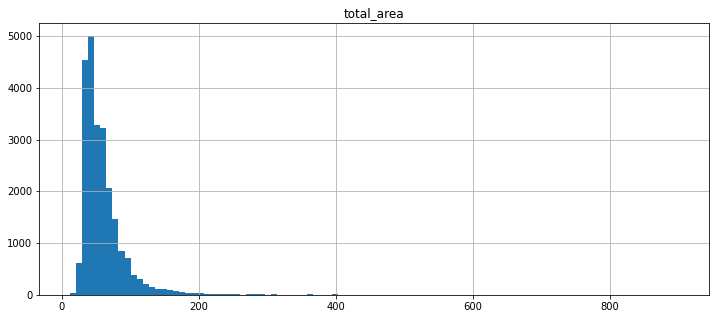

count    23564.000000
mean        60.321098
std         35.656831
min         12.000000
25%         40.000000
50%         52.000000
75%         69.700000
max        900.000000
Name: total_area, dtype: float64


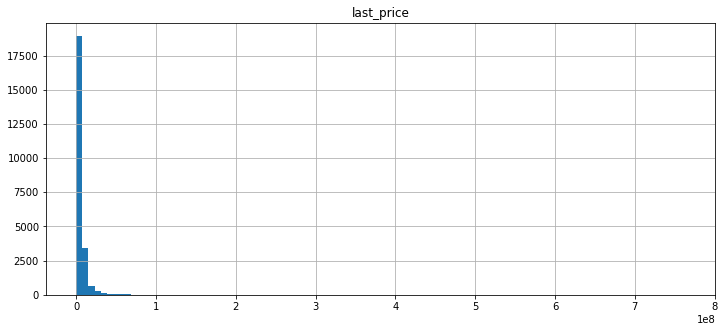

count    2.356400e+04
mean     6.539916e+06
std      1.091114e+07
min      1.219000e+04
25%      3.400000e+06
50%      4.646000e+06
75%      6.790000e+06
max      7.630000e+08
Name: last_price, dtype: float64


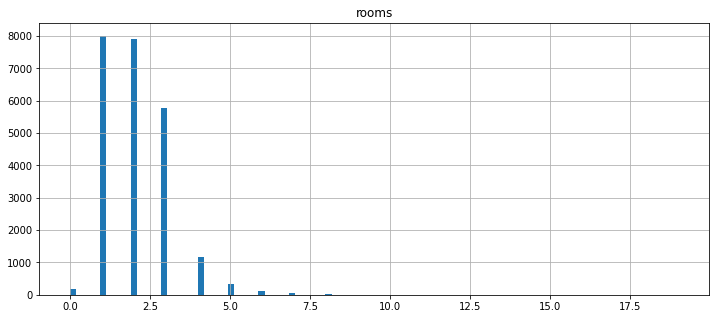

count    23564.000000
mean         2.070616
std          1.078596
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         19.000000
Name: rooms, dtype: float64


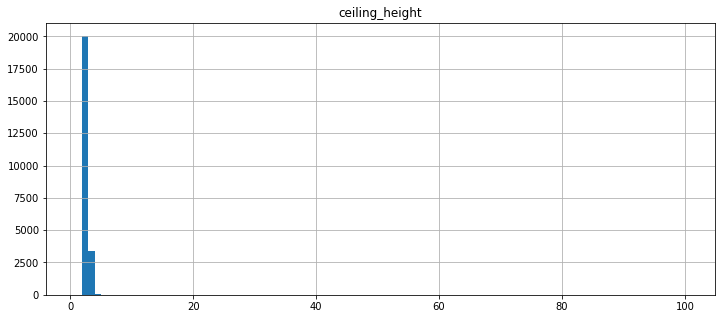

count    23564.000000
mean         2.735741
std          0.997020
min          1.000000
25%          2.550000
50%          2.650000
75%          2.750000
max        100.000000
Name: ceiling_height, dtype: float64


In [43]:
# напишем функцию, которая построет гистограммы  и информацию по необходимым столбцам.
for column in ['total_area', 'last_price', 'rooms', 'ceiling_height']:
        data.hist(column, bins=100, figsize = (12, 5))
        plt.show()
        print(data[column].describe())

По гистограмам и описанию столбцов, можно сказать, что:
- *площадь квартир - медиана:52, большинство квартир менее 70 кв.м7, очень редкие значения уже встречаются после 400 кв.м.;*
- *по цене - медиана 4.6 млн, по гистограмме прям сильно выбивающихся значений не видно, все до 1 1е8;*
- *по количеству комнат - медиана: 2, большинство не более 3ех комнат, но явно есть выбивающиеся и редкие значения;*
- *высота потолков - медиана 2,6, большая часть до 3ех метров, есть аномалии на подобии 100м.*

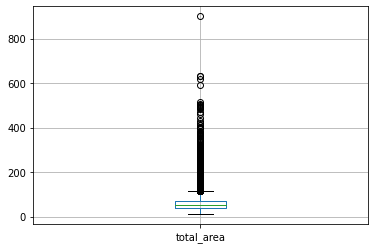

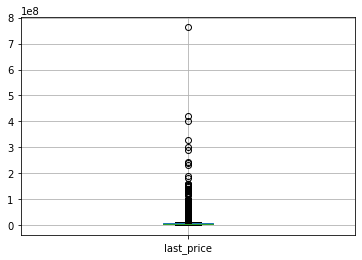

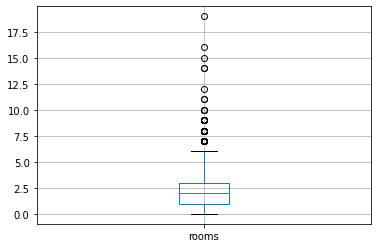

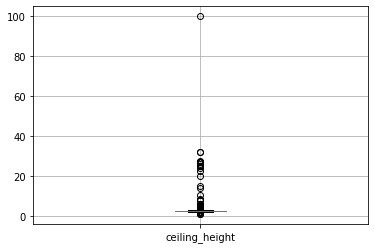

In [45]:
# построим boxplot для наглядности по выбивающимся значениям
for columns in ['total_area', 'last_price', 'rooms', 'ceiling_height']:
        data.boxplot(column = columns)
        plt.show()
        

По данным графикам явно видно выбивающиеся и редкие значения

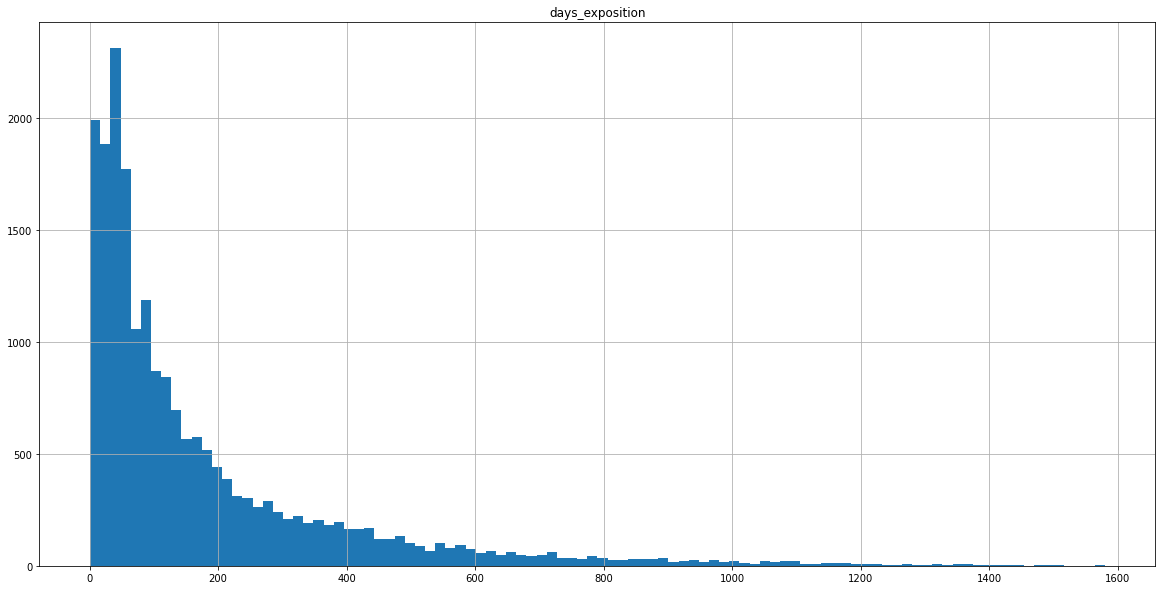

count    20393.000000
mean       180.747659
std        219.736349
min          1.000000
25%         45.000000
50%         95.000000
75%        231.000000
max       1580.000000
Name: days_exposition, dtype: float64

In [46]:
# построим гистограмму по времени продажи квартиры
data.hist('days_exposition', bins=100, figsize = (20,10))
plt.show()
data['days_exposition'].describe()

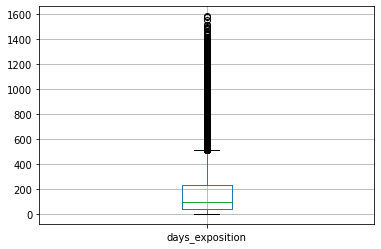

In [47]:
# построим для наглядности boxplot по времени продажи квартиры
data.boxplot(column = 'days_exposition')
plt.show()

Среднее время продажи: 181 день, медиана - 95 дней. Большая часть продаж была совершена менее чем за 231 день. По данному графику можно преположить, что когда продажа была совершена менее, чем за 45 дней это можно считать быстрой продажей. А когда продажа затянулась более, чем на 231 это долго. По графикам так же видны очень редкие значения более 1200 дней, есть предположение, что их просто забыли закрыть. 

По графикам выше можно выделить крайне редкие и выбивающие значения и сделать срез без данных значений, что б анализ был более чистым.

In [48]:
# сделаем срез без выбивающихся значений и присвоем его filt_data для дальнейшего использования уже без данных значений
filt_data = data.query('total_area < 500 & last_price < 200000000 & rooms < 7 & ceiling_height < 10 & days_exposition < 1200')

Изучим, зависит ли цена от площади, числа комнат, удалённости от центра, на каком этаже расположена квартира: первом, последнем или другом. Также изучим зависимость от даты размещения: дня недели, месяца и года.!

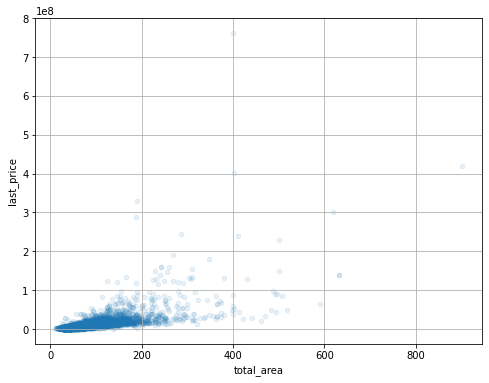

total_area 0.6536258506097912


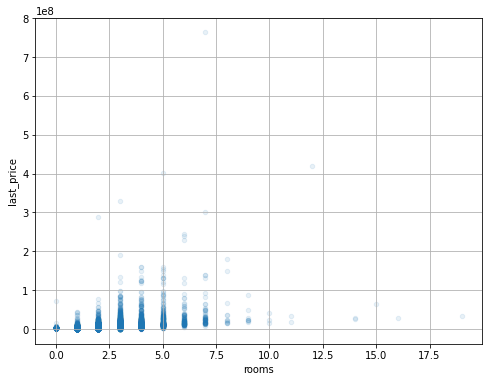

rooms 0.36318574029445755


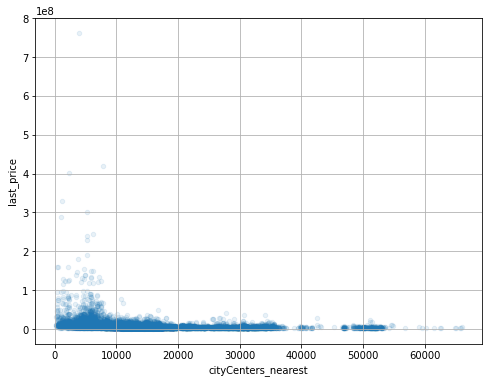

cityCenters_nearest -0.20636403497744416


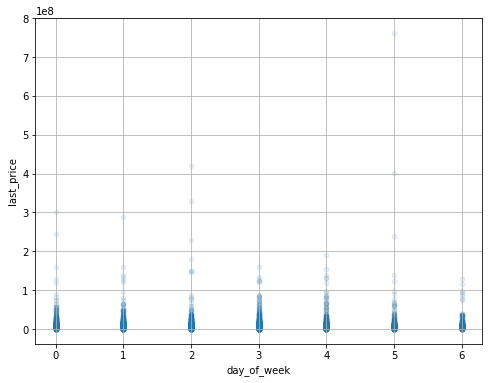

day_of_week 0.0013537637955464957


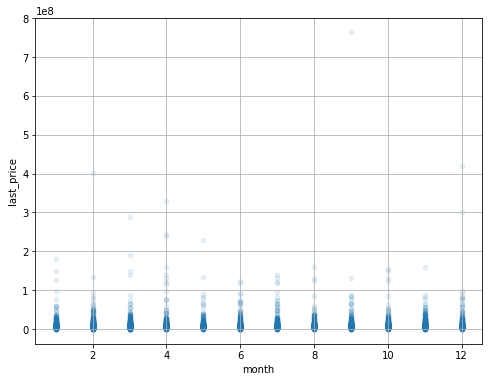

month 0.0027349756053940038


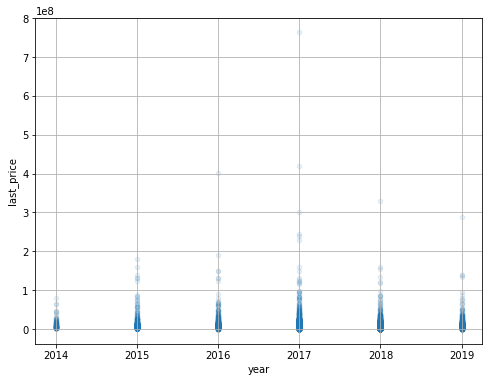

year -0.0428485552111606


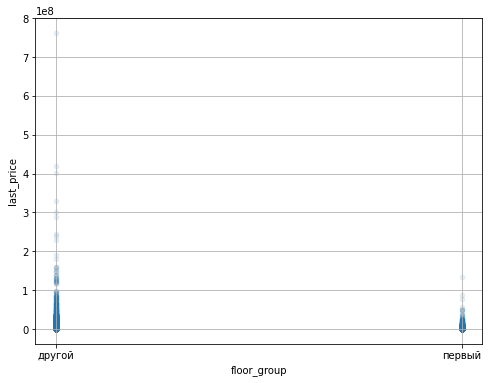

floor_group Корреляция не считается


In [49]:
# построим графики по сводным таблицам необходимых колонок и цены, а тк же посмотрим корреляцию значению 
for element in ['total_area', 'rooms', 'cityCenters_nearest', 'day_of_week', 'month', 'year', 'floor_group']:    
    data.reset_index().plot(x=element, y= 'last_price', kind='scatter', alpha=0.1, figsize=(8, 6), grid=True)
    plt.show()
    try:
        print(element, data[element].corr(data['last_price']))
    except:
        print(element, 'Корреляция не считается')
        

По индексу корреляции можно заметить, что больше всего зависимость цены от площади и количества комнат, что логично, а от всех остальных пунктов зависимость очень слабая. По графикам мы можем увидить, что чем ближе к центру, тем выше цена, что объявления размещенные в четверг имеют самую высокую цену, а в понедельник самую низкую. Можно увидеть пики по стоимости в мае, июле и сентябре, а самые высокеи цены были в 2014-2015 г.г., потом они шли на спад и в 2019г. снова идут в рост.

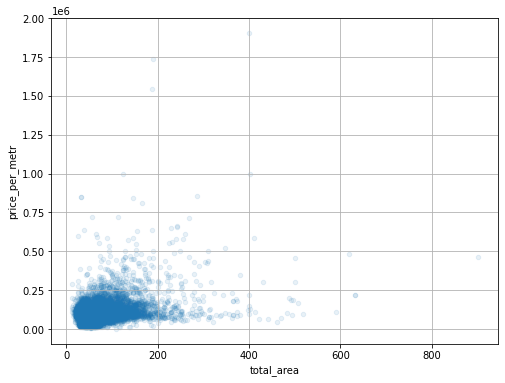

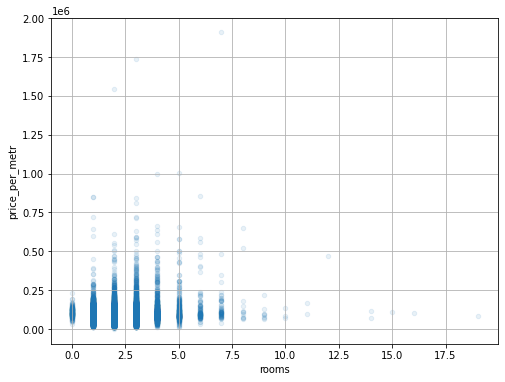

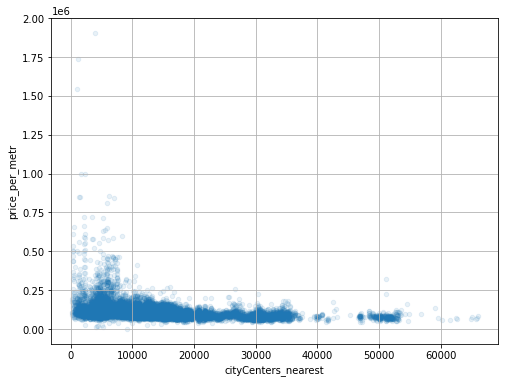

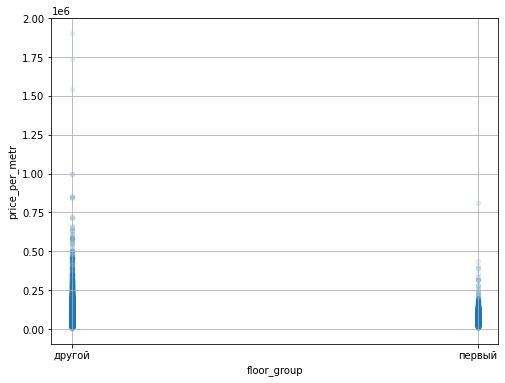

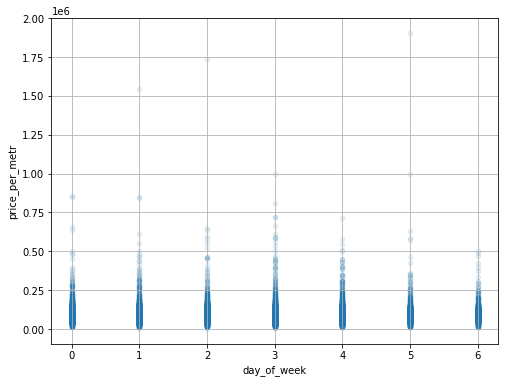

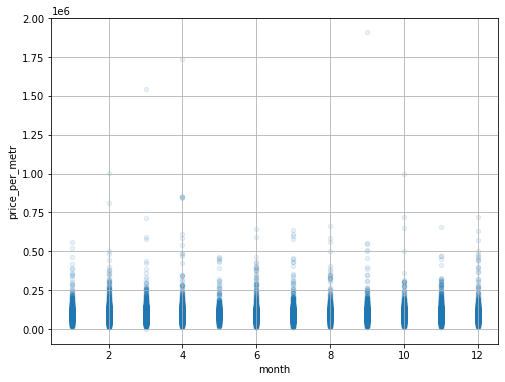

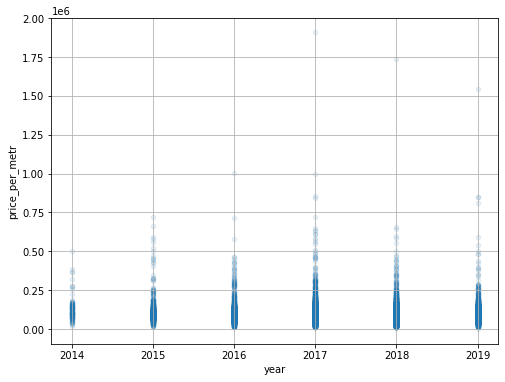

In [51]:
# построим такие же графики, но только values цена за метр
for element in ['total_area', 'rooms', 'cityCenters_nearest', 'floor_group', 'day_of_week', 'month', 'year']:    
    data.reset_index().plot(x=element, y= 'price_per_metr', kind='scatter', alpha=0.1, figsize=(8, 6), grid=True)

Так же построили графики по тем же значениям, но уже влияние их на цену за квадратный метр. в некоторых пунктах разницы нет, например в расстоянии от центра,дня недели размещения, зависимости от года размещения. Но, отличия в некоторых пункта все же есть, например от площади уже такой зависимости нет, а вот от количества комнат есть, в месяцах размещения пик только один и это сентябрь.

<AxesSubplot:xlabel='floor_group'>

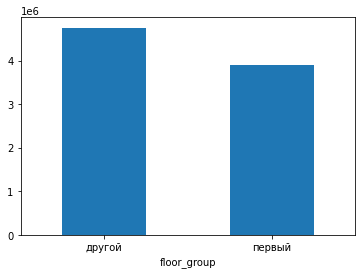

In [52]:
# построим столбчатую диаграмму по медианным значениям категории этажей
data.groupby('floor_group')['last_price'].median().plot.bar(x='floor_group', y='last_price', rot=0)

Так как floor_group обработать вышеуказанная функция не может, посмотрим на этот пункт в отдельности, как и думалось, 'другой' этаж более дорогой

Посмотрим 10 населённых пунктов с наибольшим числом объявлений. Посчитаем среднюю цену квадратного метра в этих населённых пунктах. Выделим населённые пункты с самой высокой и низкой стоимостью жилья. 

In [53]:
# выведим 10 населенных пунктов с наибольшим числом объявлений
data['locality_name'].value_counts().head(10) 

Санкт-Петербург      15650
посёлок Мурино         520
посёлок Шушары         439
Всеволожск             398
Пушкин                 369
Колпино                338
посёлок Парголово      327
Гатчина                307
деревня Кудрово        299
Выборг                 237
Name: locality_name, dtype: int64

<AxesSubplot:xlabel='locality_name'>

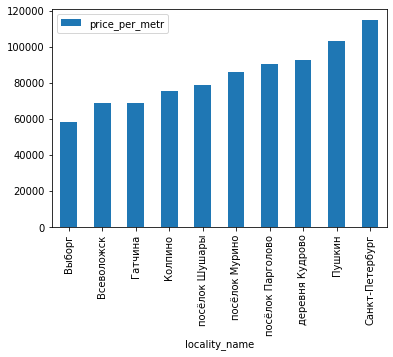

In [54]:
# построим график по сводной таблице населенных пунктов и средней цены за квадратной метр
local_top = data['locality_name'].value_counts().head(10) 
(data
    .query('locality_name in @local_top.index')
    .pivot_table(index='locality_name', values = 'price_per_metr', aggfunc='mean')
    .sort_values('price_per_metr')
    .plot(kind='bar'))


Самое дорогое жилье, как и ожидалось, в Санкт-Петербурге, а самое дешевое в Выборге.

Изучим предложения квартир в Санкт-Петербурге: для каждой квартиры есть информация о расстоянии до центра. Выясним, какая область входит в центр.

<AxesSubplot:xlabel='cityCenters_nearest'>

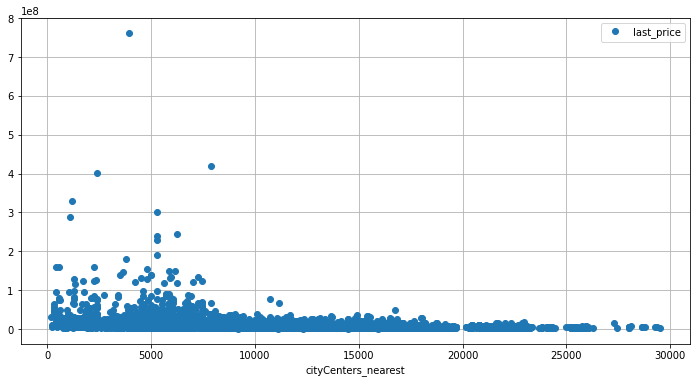

In [55]:
# посмотрим как расстояние от центра влияет на цену 
data.query('locality_name == "Санкт-Петербург"').plot(
    x='cityCenters_nearest',
    y='last_price',
    style='o',
    grid=True,
    figsize=(12, 6))

По графику видно, что нет скачков в стоимости после 7-8 км от центра.

In [56]:
# добавим столбец с расстоянием от центра в км
data['cityCenters_km'] = (data['cityCenters_nearest']/1000).round().copy()
data

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_per_metr,day_of_week,month,year,floor_group,live_general_area,kitchen_general_area,cityCenters_km
0,20,13000000.0,108.00,2019-03-07,3,2.70,16,51.0,8,True,False,False,25.000000,0,Санкт-Петербург,18863.0,16028.0,1,482.0,2,755.0,NaN,120370.37,3,3,2019,другой,0.472222,0.231481,16.0
1,7,3350000.0,40.40,2018-12-04,1,2.75,11,18.6,1,True,False,False,11.000000,2,посёлок Шушары,12817.0,18603.0,0,NaN,0,NaN,81.0,82920.79,1,12,2018,первый,0.460396,0.272277,19.0
2,10,5196000.0,56.00,2015-08-20,2,2.55,5,34.3,4,True,False,False,8.300000,0,Санкт-Петербург,21741.0,13933.0,1,90.0,2,574.0,558.0,92785.71,3,8,2015,другой,0.612500,0.148214,14.0
3,0,64900000.0,159.00,2015-07-24,3,2.60,14,45.0,9,True,False,False,27.405262,0,Санкт-Петербург,28098.0,6800.0,2,84.0,3,234.0,424.0,408176.10,4,7,2015,другой,0.283019,0.172360,7.0
4,2,10000000.0,100.00,2018-06-19,2,3.03,14,32.0,13,True,False,False,41.000000,0,Санкт-Петербург,31856.0,8098.0,2,112.0,1,48.0,121.0,100000.00,1,6,2018,другой,0.320000,0.410000,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23694,9,9700000.0,133.81,2017-03-21,3,3.70,5,73.3,3,True,False,False,13.830000,0,Санкт-Петербург,24665.0,4232.0,1,796.0,3,381.0,NaN,72490.85,1,3,2017,другой,0.547792,0.103356,4.0
23695,14,3100000.0,59.00,2018-01-15,3,2.55,5,38.0,4,True,False,False,8.500000,0,Тосно,NaN,NaN,0,NaN,0,NaN,45.0,52542.37,0,1,2018,другой,0.644068,0.144068,NaN
23696,18,2500000.0,56.70,2018-02-11,2,2.80,3,29.7,1,True,False,False,9.772820,0,село Рождествено,NaN,NaN,0,NaN,0,NaN,NaN,44091.71,6,2,2018,первый,0.523810,0.172360,NaN
23697,13,11475000.0,76.75,2017-03-28,2,3.00,17,30.5,12,True,False,False,23.300000,2,Санкт-Петербург,39140.0,10364.0,2,173.0,3,196.0,602.0,149511.40,1,3,2017,другой,0.397394,0.303583,10.0


In [57]:
# Код ревьюера

# Вот пример на массивах, но с df похожая ситуация может произойти
list_1 = [1, 2, 3]
list_2 = list_1
list_2[0] = 4

print('По идее list_1 не должен меняться, но list_1 =', list_1)

list_1 = [1, 2, 3]
list_2 = list_1.copy()
list_2[0] = 4

print('list_1 не изменился, list_1 =', list_1)

По идее list_1 не должен меняться, но list_1 = [4, 2, 3]
list_1 не изменился, list_1 = [1, 2, 3]


<AxesSubplot:xlabel='cityCenters_km'>

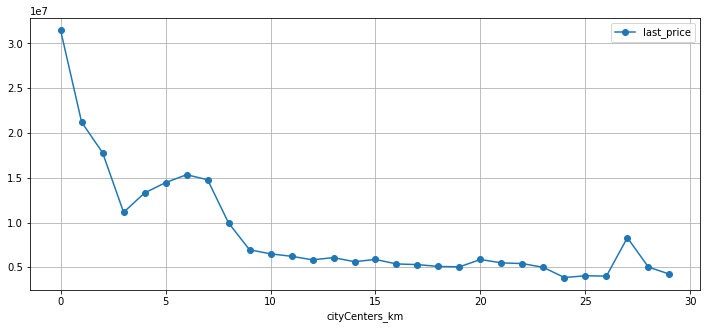

In [58]:
# построим график зависимости расстояния отцентра и цены
data.query('locality_name == "Санкт-Петербург"').pivot_table(index='cityCenters_km', values=['last_price'], aggfunc = ('mean')).plot(grid=True, style='o-', figsize=(12, 5))


В данном графике мы видем несколько перелом на 3 км и на 7км, но после 7 км роста в цене не наблюдается, значит центром можно считать все что находится в радиусе 7км.

Выделим сегмент квартир в центре. Проанализируем эту территорию и изучим следующие параметры: площадь, цена, число комнат, высота потолков. Также выделим факторы, которые влияют на стоимость квартиры (число комнат, этаж, удалённость от центра, дата размещения объявления).

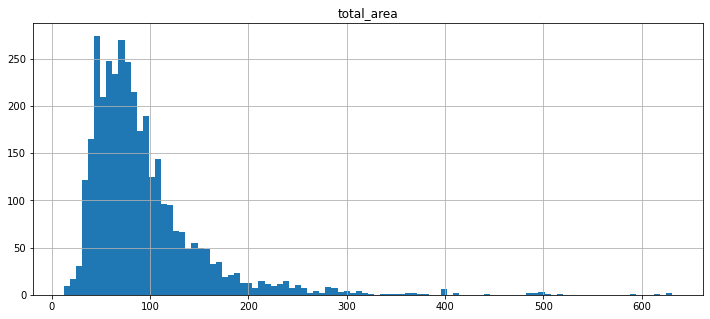

count    23564.000000
mean        60.321098
std         35.656831
min         12.000000
25%         40.000000
50%         52.000000
75%         69.700000
max        900.000000
Name: total_area, dtype: float64


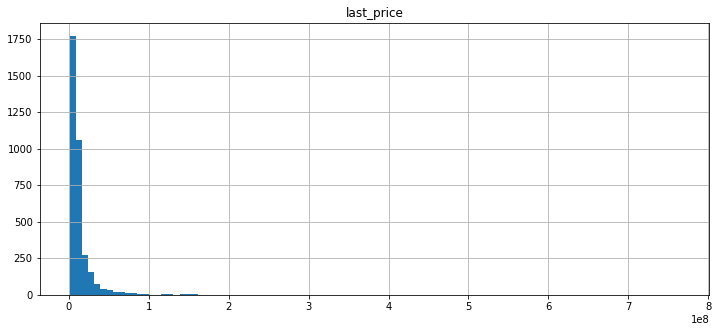

count    2.356400e+04
mean     6.539916e+06
std      1.091114e+07
min      1.219000e+04
25%      3.400000e+06
50%      4.646000e+06
75%      6.790000e+06
max      7.630000e+08
Name: last_price, dtype: float64


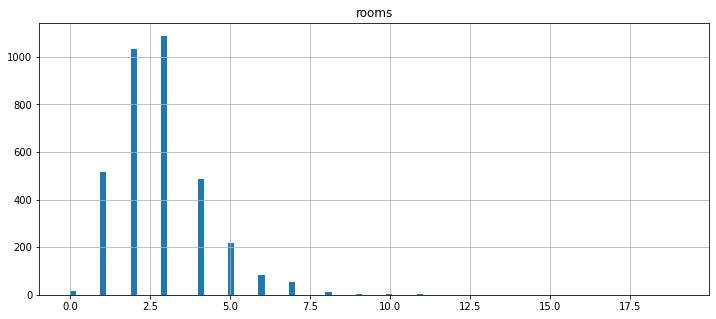

count    23564.000000
mean         2.070616
std          1.078596
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         19.000000
Name: rooms, dtype: float64


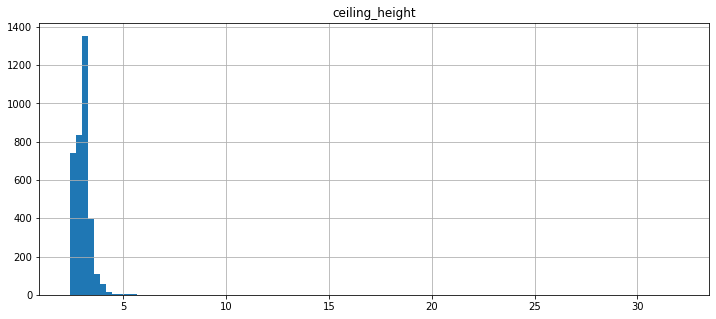

count    23564.000000
mean         2.735741
std          0.997020
min          1.000000
25%          2.550000
50%          2.650000
75%          2.750000
max        100.000000
Name: ceiling_height, dtype: float64


In [59]:
# построим гистограммы для площади, цены, количества комнат и высоты потолков для квартир в центре Санкт-Петербурга
for column in ['total_area', 'last_price', 'rooms', 'ceiling_height']:
        data.query('locality_name == "Санкт-Петербург" & cityCenters_km <= 7').hist(column, bins=100, figsize = (12, 5))
        plt.show()
        print(data[column].describe())

Почти все графики имеют нормальное распределение, по данным графикам мы можем сказать, что:
- *площадь квартир -медиана:50, большинство квартир менее 70 кв.м7, очень редкие значения уже встречаются после 400 кв.м.;*
- *по цене - медиана 4.5 млн,по гистограмме видно, что есть небольшое количество объявлений, с высокой ценой, чего не было видно в общем массиве данных*
- *по количеству комнат - медиана: 2,большинство не более 3ех комнат, максимум комнат 6*
- *высота потолков - медиана:2.65, большая часть до 3ех метров,явный пи есть около высоты 3 м*

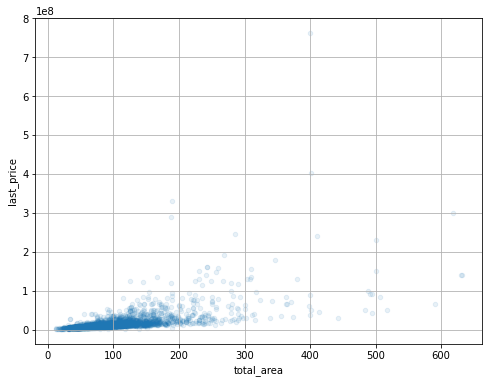

total_area 0.6536258506097912


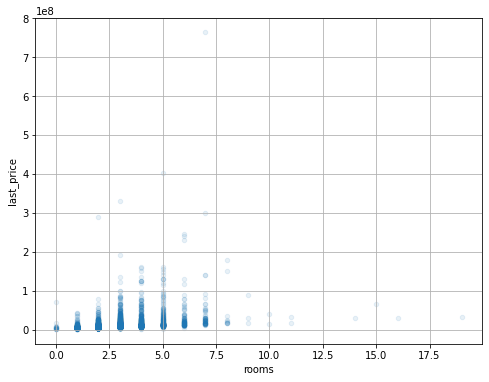

rooms 0.36318574029445755


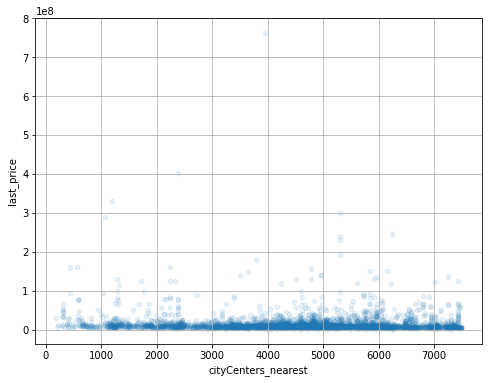

cityCenters_nearest -0.20636403497744416


In [60]:
# посмотрим зависимость цены от разных критереев в центре Санкт-Петербурга
for element in ['total_area', 'rooms', 'cityCenters_nearest']:    
    data.query('locality_name == "Санкт-Петербург" & cityCenters_km <= 7').plot(x=element, y= 'last_price', kind='scatter', alpha=0.1, figsize=(8, 6), grid=True)
    plt.show()
    try:
        print(element, data[element].corr(data['last_price']))
    except:
        print(element)
    

Для категориальных данных построим столбчатые диаграммы, что б увидеть зависимость от цены

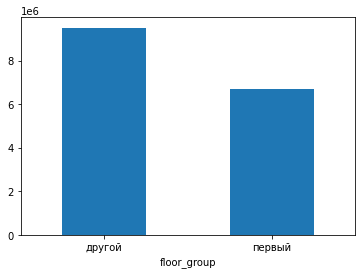

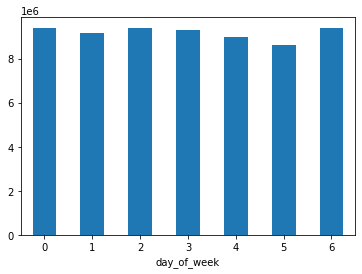

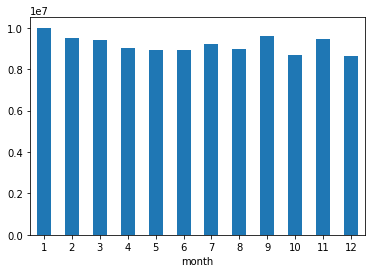

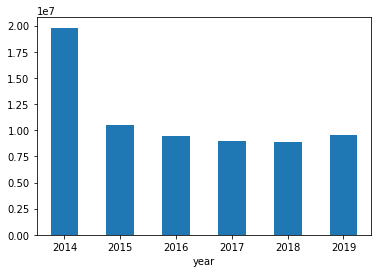

In [61]:
for element in ['floor_group', 'day_of_week', 'month', 'year']:
    data.query('locality_name == "Санкт-Петербург" & cityCenters_km <= 7').groupby(element)['last_price'].median().plot.bar(x='floor_group', y='last_price', rot=0)
    plt.show()

По графикам мы можем увидить, что цена зависит от площади но только до 270 кв.м., зависит от количества комнат, не зависит от расстояния до центра, так же можно увидеть отсутствие явной зависимости от дня неделеи и месяца размещения. Можно увидеть небольшой пик по стоимости в январе, а самые высокии цены были в 2014-2015 г.г., потом они шли на спад и в 2019г. снова идут в рост.

### Вывод

Средняя квартира, выставленная на продажу, имеет следующие характеристики: это 2-комнатная квартира площадью 52 кв. м с потолками 2,65 м, проданная за 3 месяца (95 дней) по цене 4,6 млн рублей. Если квартира продана менее, чем за месяц можно предпологать мошеннические оппреации. 
Факторы наиболее влияющие на стоимость квартиры: это площадь, количество комнат и близость к центру. Квартиры, которые находятся этаже: 'другой', имеют более высокую цену. 
Из представленных 10 населенных пунктов с наибольшим числом объявлений лидер по средней цене за квадратный метр это Санкт-Петербург, а самая низкая цена в Выборге. 
Средняя квартра в центре Питера не особо отличается и имеет почти такие же характеристики.Так же у квартиры в центре нет уже такой явной зависимости от расстояни до центра.


## Общий вывод

* Мы изучили датасет в  23699 строк  и 22 столбца. 
* Заменили и убрали значительную часть пропусков, где это было логично и возможно. 
* Так же поработали с типом данных и проверили датасет на дубликаты.
* Мы расчитали и добавили для дальнейшей работы необходимые нам столбцы:
    * посчитали цену за кв.метр, 
    * разбили формат даты для удобства работы, 
    * сделали категоризацию по этажам 
    * посчитали отношение жилой площади и кухни к общей площади.

* **Определили среднюю квартиру:** это 2-комнатная квартира площадью 52 кв. м с потолками 2,65 м, проданная за 3 месяца (95 дней) по цене 4,6 млн рублей. 
* _Определили факторы, которые сильнее всего влияют на стоимость:_ 
    * это площадь, 
    * этажность, 
    * количество комнат, 
    * близость к центру, 
    

* **Оптимальное время продажи:** от 3-ех месяцев до 1,5 года. 

* **Рекомендации:** 
    * Смотреть на время продажи, все что продается быстрее чем за месяц, скорей всего, мошенническая деятельность. 
    * Поставить ограничения на некоторые характеристики, например потолки в 100 метров явно ошибка.
    * Взять основные факторы для определения цены: площадь, этажность, количество комнат, близость к центру.